# Fourier Series: Arcs
This notebook shows how to compute the Fourier series of ellipse arcs.

### Content
1. [Prerequisites](#prerequisites)
2. [Representing Arcs](#representation)
3. [Fourier Series of Arcs](#fourier_computation)
    1. [Proof](#proof)
    2. [Implementation](#implementation)
4. [Example](#example)

In [1]:
%matplotlib inline

# Initial imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Prerequisites <a id='prerequisites'></a>
This notebook shows how to compute the Fourier series of straight lines and polygones. For this, you should be familiar with:
- The general computation of [Fourier series of curves](Fourier-Series-of-Curves-Background.ipynb) and especially the case of piecewiese defines curves.
- Complex numbers, especially the representation of 2-dimensional points as complex numbers and polar coordinates
- Computation of integrals of curves

## Representing Ellipses and Arcs <a id='representation'></a>
An arc of an ellipse can be parameterized by the following values:
- The center $p\in\mathbb{C}$ of the ellipse
- The radius $r_1\in\mathbb{R}$ along the first axis of the ellipse
- The radius $r_2\in\mathbb{R}$ along the second axis of the ellipse
- The angle $\phi$ of the rotation of the first axis relative to the $x$-axis (or real axis of the complex plain)
- The starting angles $\theta_1$ and the end angle $\theta_2$ of the arc

An arc curve $g:[a,b]\to\mathbb{C}$ can then be written as:

$$
\begin{equation}
    g(t) = p + e^{i\phi}\left(r_1\cos\theta(t) + r_2i\sin\theta(t)\right)
    \label{eqn:arc_curve}
\end{equation}
$$
with
$$
\begin{equation}
    \theta(t) = \theta_1 + \frac{t - a}{b - a}\left(\theta_2 - \theta_1\right)
    \label{eqn:theta_fct}
\end{equation}
$$



## Fourier Series of Arcs <a id='fourier_computation'></a>
Based on (\ref{eqn:arc_curve}) and (\ref{eqn:theta_fct}), we can compute the contribution of an arc segment over $[a,b]$ to the Fourier coefficients of a piecewise functions as:

$$
\begin{equation}
    \int_a^b g(t)e^{-i\lambda t}dt = p\cdot S_{a,b}\left(-i\lambda\right)+ 
    \frac{r_1+r_2}2e^{i\left(\phi+\theta_1 - \frac{\theta_2 - \theta_1}{b - a}a\right)}\cdot S_{a,b}\left(i\frac{\theta_2 - \theta_1}{b - a}-i\lambda\right)+ 
    \frac{r_1-r_2}2e^{i\left(\phi-\theta_1 + \frac{\theta_2 - \theta_1}{b - a}a\right)}\cdot S_{a,b}\left(-i\frac{\theta_2 - \theta_1}{b - a}-i\lambda\right)
    \label{eqn:arc_integral}
\end{equation}
$$

with

$$
\begin{equation}
    S_{a,b}\left(x\right) = \int_a^be^{xt}dt = \left\{\begin{array}{ll}(b-a) & \text{if }x = 0\\\frac{e^{x b}-e^{x a}}{x}&\text{if }x \neq 0\end{array}\right.
    \label{eqn:fct_S}
\end{equation}
$$


### Proof: <a id='proof'></a>
One can rewrite $g$ as:
$$
\begin{align}
    g(t) &= p + e^{i\phi}\left(r_1\cos\theta(t) + r_2i\sin\theta(t)\right) \nonumber\\
         &= p + e^{i\phi}\left(\frac{r_1+r_2}{2}e^{i\theta(t)} + \frac{r_1-r_2}{2}e^{-i\theta(t)}\right) \nonumber\\
         &= p + \frac{r_1+r_2}{2}e^{i(\phi + \theta(t))} + \frac{r_1-r_2}{2}e^{i(\phi - \theta(t))} \label{eqn:arc_curve_reformulated}
\end{align}
$$

and $\theta$ as
$$
\begin{equation}
    \theta(t) = \theta_1 + \frac{t - a}{b - a}\left(\theta_2 - \theta_1\right) = \left(\theta_1 - \frac{\theta_2 - \theta_1}{b - a}a\right) + \frac{\theta_2 - \theta_1}{b - a}t 
    \label{eqn:theta_fct_reformulated}
\end{equation}
$$

Using this, the integral can be rewritten as:

$$
\begin{align*}
    \int_a^b g(t)e^{-i\lambda t} dt &\stackrel{(\ref{eqn:arc_curve_reformulated})}= \int_a^b pe^{-i\lambda t} dt + \frac{r_1+r_2}2\int_a^b e^{i(\phi + \theta(t)-\lambda t)}dt+ \frac{r_1-r_2}2\int_a^b e^{i(\phi - \theta(t)-\lambda t)}dt\\
    &\stackrel{(\ref{eqn:theta_fct_reformulated})}= p\int_a^b e^{-i\lambda t} dt + 
    \frac{r_1+r_2}2e^{i\left(\phi+\theta_1 - \frac{\theta_2 - \theta_1}{b - a}a\right)}\int_a^b e^{i\left(\frac{\theta_2 - \theta_1}{b - a}-\lambda\right)t}dt+ 
    \frac{r_1-r_2}2e^{i\left(\phi-\theta_1 + \frac{\theta_2 - \theta_1}{b - a}a\right)}\int_a^b e^{i\left(-\frac{\theta_2 - \theta_1}{b - a}-\lambda\right)t}dt\\
    &\stackrel{(\ref{eqn:fct_S})}= p\cdot S_{a,b}\left(-i\lambda\right)+ 
    \frac{r_1+r_2}2e^{i\left(\phi+\theta_1 - \frac{\theta_2 - \theta_1}{b - a}a\right)}\cdot S_{a,b}\left(i\frac{\theta_2 - \theta_1}{b - a}-i\lambda\right)+ 
    \frac{r_1-r_2}2e^{i\left(\phi-\theta_1 + \frac{\theta_2 - \theta_1}{b - a}a\right)}\cdot S_{a,b}\left(-i\frac{\theta_2 - \theta_1}{b - a}-i\lambda\right)
\end{align*}
$$



### Implementation <a id='implementation'></a>
Implementation of the integral of the exponential $S_{a,b}(x)=\int_a^be^{x t}dt$  
The function allows to process multiple values of $x$ at once.

In [3]:
def exp_int(x, a, b):
    
    x = np.asarray(x)
    result = np.zeros(shape=x.shape, dtype=np.complex)
    
    # Handle Case l != 0
    x_ = x[x!=0]
    result[x!=0] = (np.exp(x_*b) - np.exp(x_*a)) / x_
    
    # Handle case l=0
    result[x==0] = b - a
    
    # Return results
    return result

Putting together the integral of an arc segment according to $(\ref{eqn:arc_integral})$:

In [4]:
def transform_arc(p, r1, r2, phi, theta1, theta2, l, a, b):
    i = 1j   # Just for shorter notations
    
    l = np.asarray(l)
    
    # Compute summand 1
    s1 = p * exp_int(-i*l, a, b)
    
    # Compute summand 2
    e2 = i * (phi + theta1 - (theta2-theta1) / (b - a) * a)
    x2 = i * (theta2-theta1) / (b - a) - i * l
    s2 = (r1+r2) / 2 * np.exp(e2) * exp_int(x2, a, b)
    
    # Compute summand 3
    e3 = i * (phi - theta1 + (theta2-theta1) / (b - a) * a)
    x3 = - i * (theta2-theta1) / (b - a) -i * l
    s3 = (r1-r2) / 2 * np.exp(e3) * exp_int(x3, a, b)
    
    # Return the sum of all three
    return  s1 + s2 + s3

When performing the fourier transformation on a closed sequences of arcs, we need to compute the lengths of arcs to find the individual bordes $[a,b]$ of the segments. Unfortunatly, elliptic integrals do not have a closed form. Hence we just approximate the length.

In [5]:
def len_of_arc(r1, r2, theta1, theta2, delta_theta=np.pi/180):
    # Number of interpolation points
    if theta2 < theta1:
        theta1, theta2 = theta2, theta1
    
    n = np.ceil((theta2 - theta1) / delta_theta)
    
    # Adjust delta_theta to get equidistant thetas
    delta_theta = (theta2 - theta1) / n
    
    # Compute angles for arc length interpolation
    theta = np.arange(theta1, theta2 + delta_theta / 2, delta_theta)
    
    z = r1 * np.cos(theta) + r2 * 1j * np.sin(theta)
    diff = z[1:] - z[:-1]
    
    L = np.abs(diff).sum()
    
    return L

Fourier series of piecewise arcs.

In [6]:
def transform_piecewise_arcs(p, r1, r2, phi, theta1, theta2, n):
    # Number of pieces
    m = len(p)
    
    l = [len_of_arc(r1[i], r2[i],theta1[i],theta2[i]) for i in range(m)]
    l = np.asarray(l)
    
    # Compute t_0 to t_m based on the lengths with t_0 = 0 and t_m = 2\pi
    t = l.cumsum() / l.sum()
    t = 2 * np.pi * np.concatenate([[0], t])
    
    # get vector of k
    k = np.arange(-n,n+1)
    
    c = sum([transform_arc(p[i], r1[i], r2[i], phi[i], theta1[i], theta2[i], k, t[i], t[i+1]) for i in range(m)])
    
    return c, k
    
    

Get the fourier approximation as a function.  
This will be used to plot the fourier approximation.

In [7]:
def get_fourier_fct(c, k):
    # Reshape the fourier coefficients row vectors
    c = np.reshape(c, (1,-1))
    k = np.reshape(k, (1,-1))
    
    def fct(t):
        # Reshape the input values into a column vector
        t = np.reshape(t, (-1,1))
        
        return np.sum(c * np.exp(1j * k * t), axis=1) / (2 * np.pi)
    
    return fct

### Example: Flower <a id='example'></a>

In [8]:
# Center Circle of the flower
r = 4

p = [0]
r1 = [r]
r2 = [r]
phi = [0]
theta1 = [0]
theta2 = [2 * np.pi]

# Petals
n_petals = 7      # Number of Petals
d = 3             # Longest distance of the petals to the circle

# Iterate over the Petals
for i in range(n_petals):
    # Connection points with the center circle
    p0 = r * np.exp(2j * i * np.pi / n_petals)
    p1 = r * np.exp(2j * (i + 1) * np.pi / n_petals)
    
    # Center is in the middle
    center = (p0 + p1) / 2
    
    # Rotation: second axis connects p0 and p1
    phi_ = (2*i + 1) * np.pi / n_petals
    r2_ = np.abs(center - p0)
    r1_ = r - np.abs(center) + d
    
    # Append arc
    p.append(center)
    r1.append(r1_)
    r2.append(r2_)
    phi.append(phi_)
    theta1.append(-np.pi/2)
    theta2.append(np.pi/2)

In [9]:
N = 20

# Compute coefficients c_{-N} to c_N
c,k = transform_piecewise_arcs(p, r1, r2, phi, theta1, theta2, N)

# Get approximations (limited to different values n=1,...,N)
fcts = [get_fourier_fct(c[np.abs(k) <= n], k[np.abs(k) <= n]) for n in range(1,N+1)]

*Showtime!* Plotting the results.

In [10]:
def arc_to_points(p, r1, r2, phi, theta1, theta2, n_points = None):
    if n_points is None:
        n_points = int(np.ceil(180 * np.abs(theta2 - theta1) / np.pi)) + 1
        
    theta = (theta2 - theta1) * np.arange(n_points) / n_points + theta1
    
    z = p + np.exp(1j*phi)*(r1 * np.cos(theta) + 1j*r2*np.sin(theta))
    
    return z

In [11]:
def plot_arcs(p, r1, r2, phi, theta1, theta2, *args, **kwargs):
    m = len(p)
    
    z = [arc_to_points(p[i], r1[i], r2[i], phi[i], theta1[i], theta2[i]) for i in range(m)]
    
    z = np.concatenate(z)
    x, y = np.real(z), np.imag(z)
    
    plt.plot(x, y, *args, **kwargs)

In [12]:
# plot closed curve of complex 
def plotcc(p, *args, **kwargs):
    # close curve
    m = len(p)
    p = np.reshape(p, (-1))
    p = p[list(range(m)) + [0]]
    
    # Complex to real x and y vectors
    x, y = np.real(p), np.imag(p)
    
    plt.plot(x, y, *args, **kwargs)

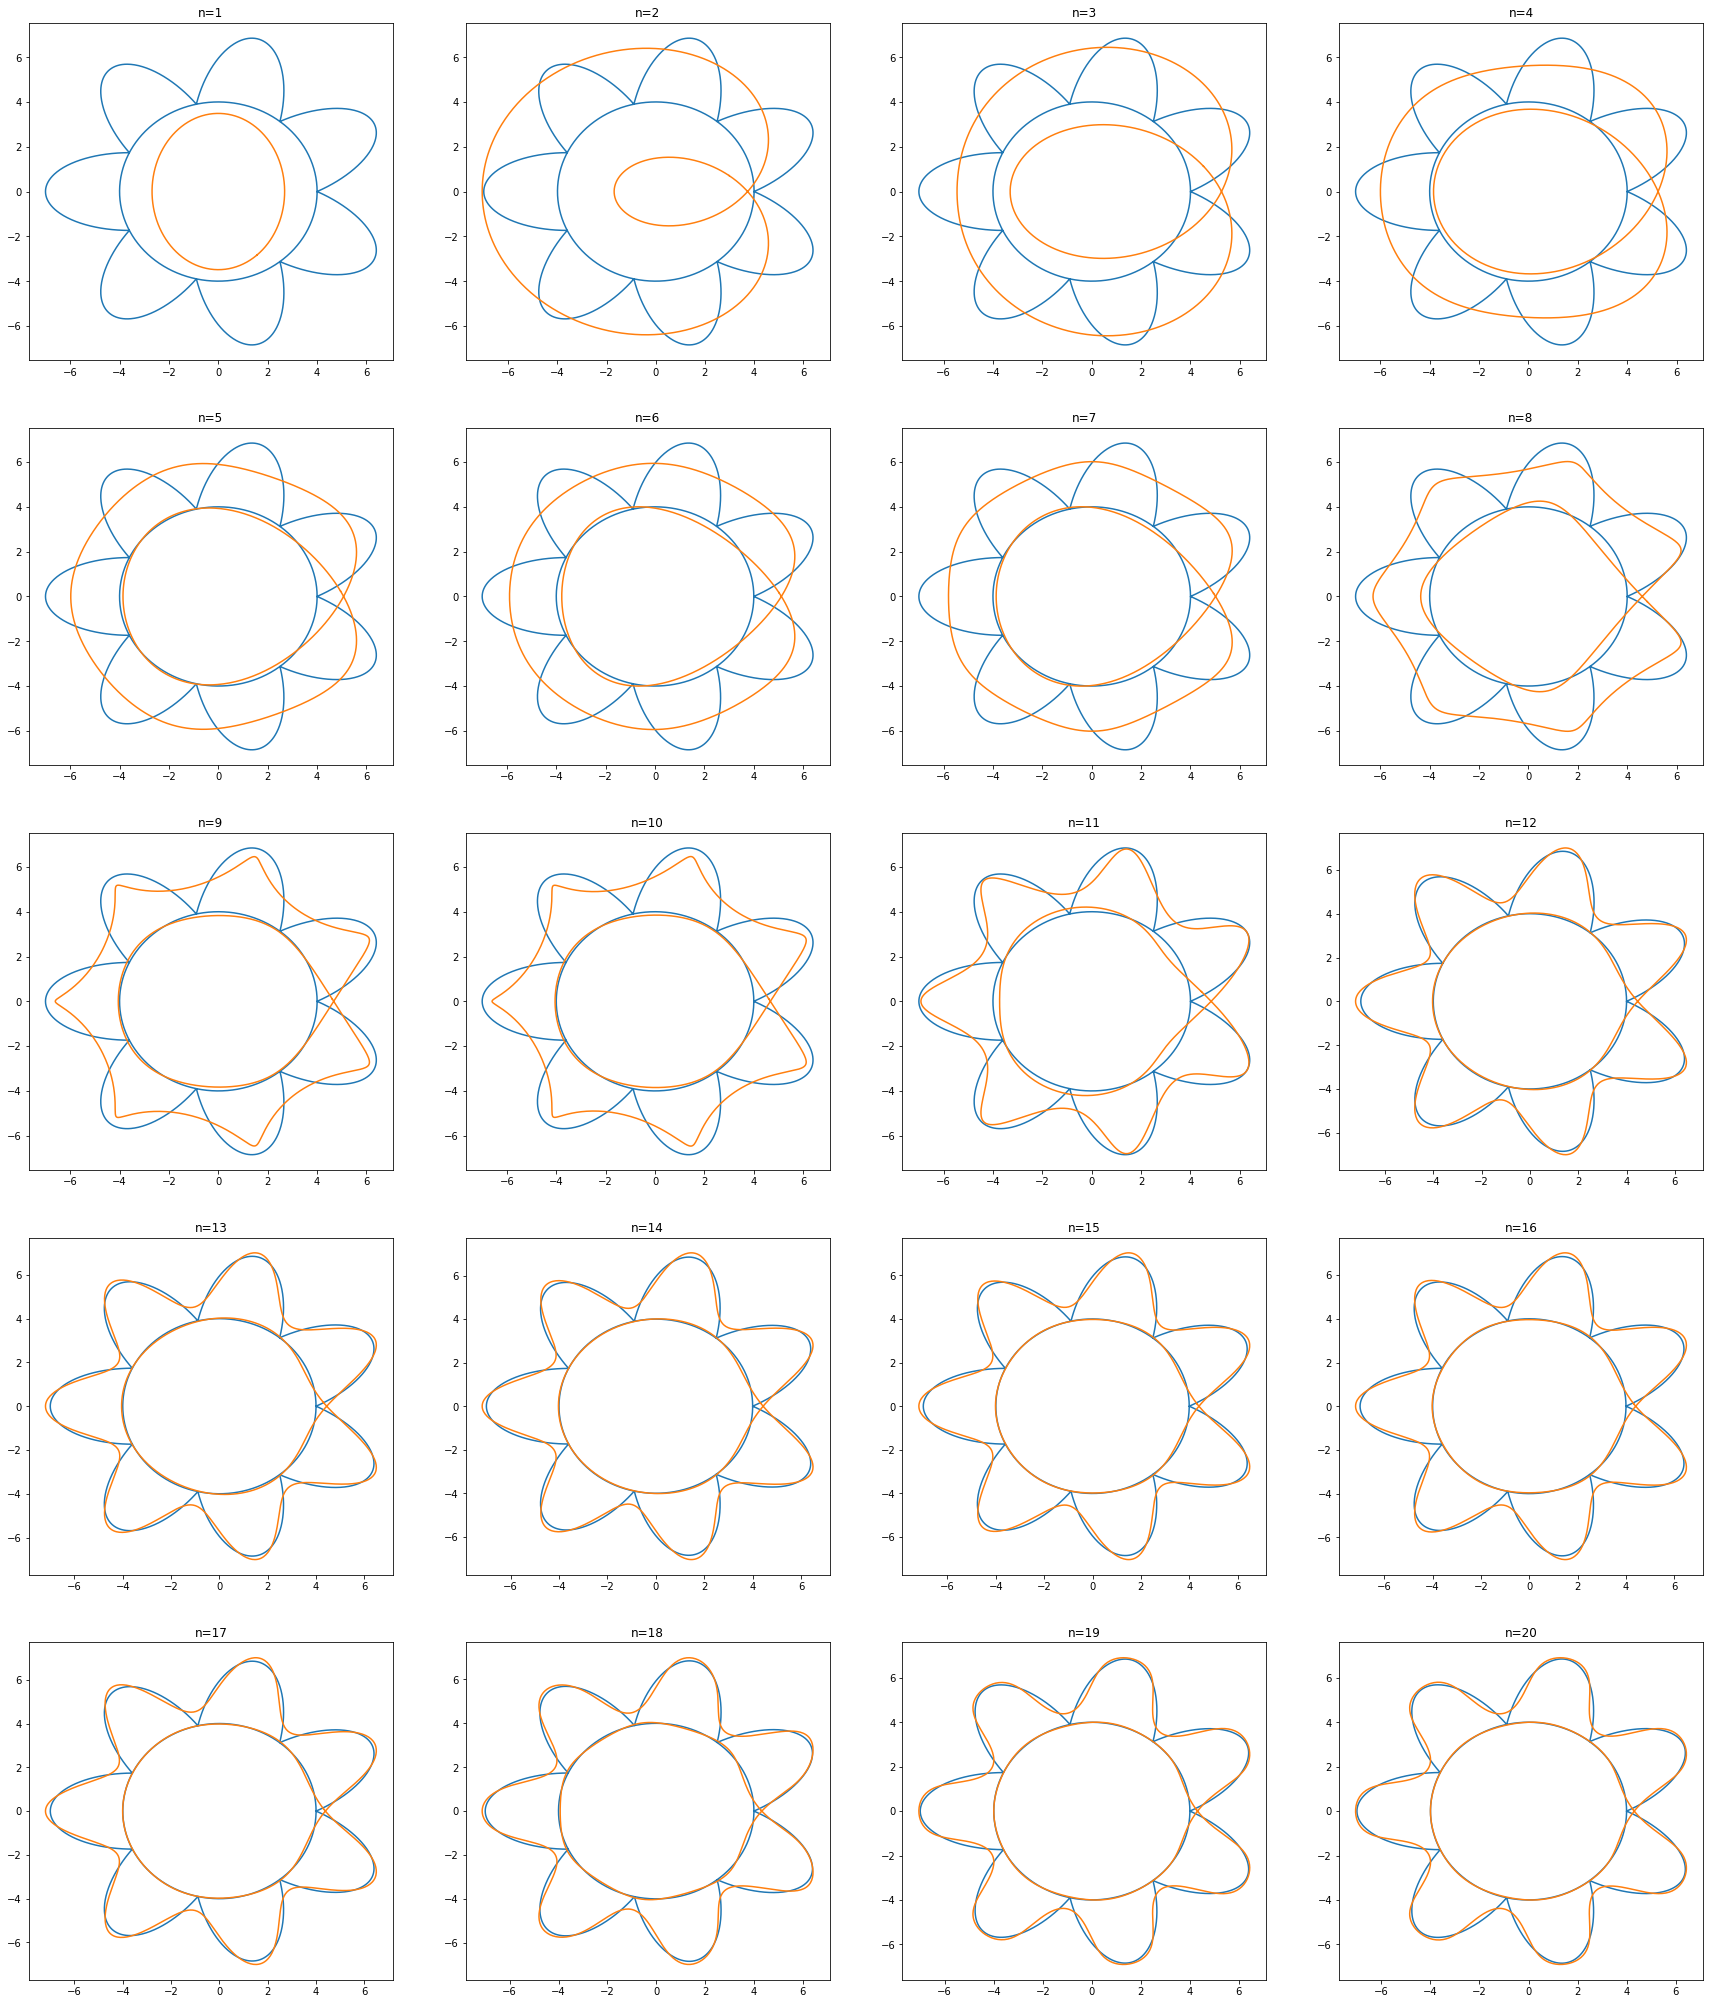

In [13]:
plt.figure(figsize=(30,36))

# Number of points
nT = 1000

t = 2 * np.pi * np.arange(0,1, 1/nT)

for n in range(1, N+1):
    pf = fcts[n-1](t)
    
    plt.subplot(5,4,n)
    plot_arcs(p,r1,r2,phi,theta1,theta2)
    plotcc(pf)
    plt.title(f"n={n}")

plt.show()